
Columns:
Country : The country that the wine is from 

Description : Description of wine 

Designation : The vineyard within the winery where the grapes that made the wine are from

Points : The number of points WineEnthusiast rated the wine on a scale of 1-100

Price : The cost for a bottle of the wine

Province : The province or state that the wine is from

Region_1 : The wine growing area in a province or state (ie Napa)

Region_2: More specific region within wine growing area

Taster_name : The taster of the wines names.

Taster_twitter_handle : The taster twitter name

Title : The title of the wine review]

Variety : Type of wine 

Winery : The winery that made the wine

In [3]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split #used to split data into training/test sets
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import seaborn as sns 

In [4]:
#Load dataframe and show the top 10 columns 
df = pd.read_csv('wine_reviews.csv')
df.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [5]:
#dimensions of dataframe
df.shape

(129971, 14)

In [6]:
#column types
df.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [7]:
print(df.isna().sum())

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64


In [11]:
#Check for duplicates 
df[df.duplicated('description', keep=False)].sort_values('description').head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
67614,67614,US,"100% Malbec, it's redolent with dark plums, wi...",NaN,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge
46540,46540,US,"100% Malbec, it's redolent with dark plums, wi...",NaN,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge
119702,119702,US,"100% Sangiovese, this pale pink wine has notes...",Meadow,88,18.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Ross Andrew 2013 Meadow Rosé (Columbia Valley ...,Rosé,Ross Andrew
72181,72181,US,"100% Sangiovese, this pale pink wine has notes...",Meadow,88,18.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Ross Andrew 2013 Meadow Rosé (Columbia Valley ...,Rosé,Ross Andrew
73731,73731,France,"87-89 Barrel sample. A pleasurable, perfumed w...",Barrel sample,88,NaN,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,Château Lalande-Borie 2008 Barrel sample (Sai...,Bordeaux-style Red Blend,Château Lalande-Borie
100745,100745,France,"87-89 Barrel sample. A pleasurable, perfumed w...",Barrel sample,88,NaN,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,Château Lalande-Borie 2008 Barrel sample (Sai...,Bordeaux-style Red Blend,Château Lalande-Borie
73730,73730,France,87-89 Barrel sample. Minty aromas give lifted ...,Barrel sample,88,NaN,Bordeaux,Saint-Émilion,NaN,Roger Voss,@vossroger,Château Haut-Sarpe 2008 Barrel sample (Saint-...,Bordeaux-style Red Blend,Château Haut-Sarpe
100744,100744,France,87-89 Barrel sample. Minty aromas give lifted ...,Barrel sample,88,NaN,Bordeaux,Saint-Émilion,NaN,Roger Voss,@vossroger,Château Haut-Sarpe 2008 Barrel sample (Saint-...,Bordeaux-style Red Blend,Château Haut-Sarpe
73729,73729,France,87-89 Barrel sample. With its lovely fresh fru...,Barrel sample,88,NaN,Bordeaux,Lalande de Pomerol,NaN,Roger Voss,@vossroger,Château Bertineau Saint-Vincent 2008 Barrel sa...,Bordeaux-style Red Blend,Château Bertineau Saint-Vincent
100743,100743,France,87-89 Barrel sample. With its lovely fresh fru...,Barrel sample,88,NaN,Bordeaux,Lalande de Pomerol,NaN,Roger Voss,@vossroger,Château Bertineau Saint-Vincent 2008 Barrel sa...,Bordeaux-style Red Blend,Château Bertineau Saint-Vincent


In [13]:
# Drop Duplicates
df.drop_duplicates(('description','title'), inplace = True)
df[pd.notnull(df.price)]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [17]:
#Handle Missing Values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)

missing_data =pd.concat([total,percent], axis =1, keys = ['Total','Percent'])
missing_data

,Total,Percent
region_2,73219,61.021936
designation,34545,28.790379
taster_twitter_handle,29446,24.540787
taster_name,24917,20.766243
region_1,19560,16.301630
price,8395,6.996533
country,59,0.049172
province,59,0.049172
variety,1,0.000833
Unnamed: 0,0,0.000000


<AxesSubplot:>

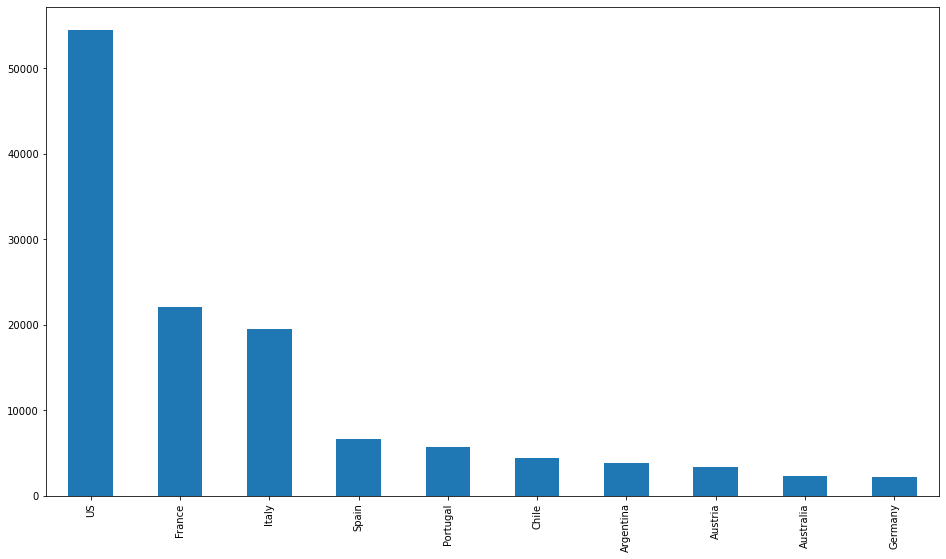

In [9]:
# Bar Graph of Reviews by Country
plt.figure(figsize=(16,9))
df['country'].value_counts().head(10).plot.bar()

Text(0, 0.5, 'Ratings Occurances')

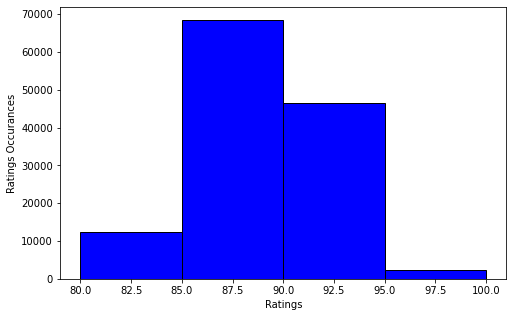

In [6]:
#Histogram of Ratings Occurances 
fig, ax = plt.subplots(figsize= (8,5))
plt.hist (df['points'], bins=4 , color = 'blue', edgecolor='black')
plt.xlabel('Ratings')
plt.ylabel('Ratings Occurances')

(-0.5, 999.5, 799.5, -0.5)

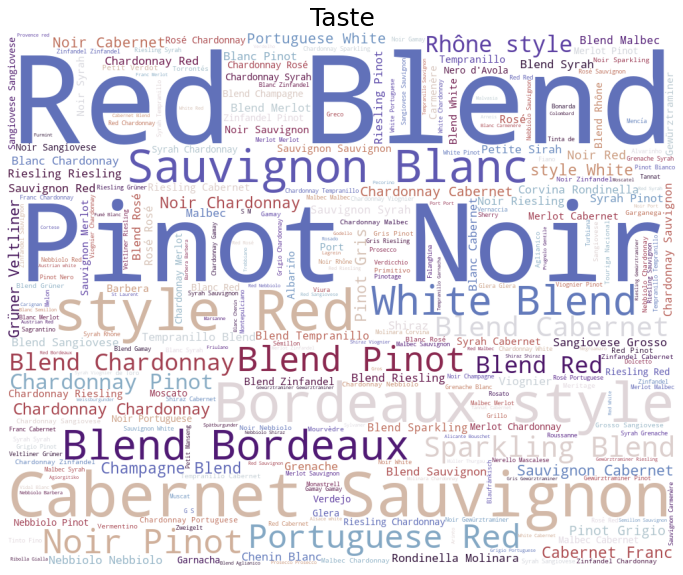

In [40]:
# Word Cloud
from wordcloud import WordCloud  
from wordcloud import STOPWORDS  

stopwords = set(STOPWORDS)
newStopWords = ['fruit', "Drink", "black", 'wine', 'drink']
stopwords.update(newStopWords)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    colormap='twilight_r',
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df['variety'].astype(str)))
print(wordcloud)


fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title(" Taste ",fontsize=25)
plt.axis('off')


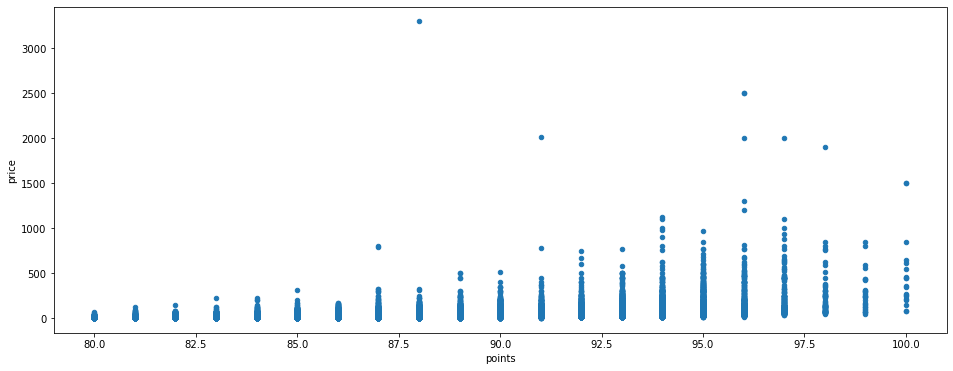

In [8]:
#Scatterplot of correlation of price and quality of wine.
df.plot.scatter(x='points', y='price', figsize=(16, 6));

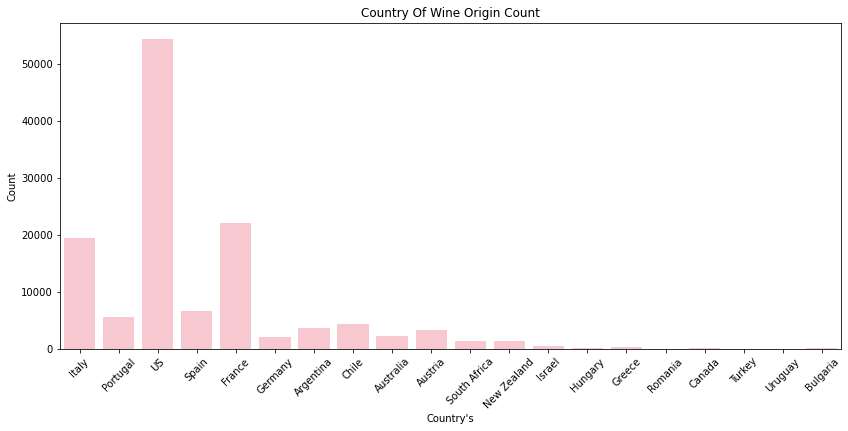

In [9]:
# Country's occurances by count. 
plt.figure(figsize=(14,6))

country = df.country.value_counts()[:20]

g = sns.countplot(x='country', 
                  data=df[df.country.isin(country.index.values)],
                 color='pink')
g.set_title("Country Of Wine Origin Count")
g.set_xlabel("Country's")
g.set_ylabel("Count")
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

In [18]:
#Pie chart based on province occurance
df['province'].value_counts().head(20).plot.pie()
plt.gca().set_aspect('equal')

SyntaxError: invalid syntax (Temp/ipykernel_20000/2282968567.py, line 1)

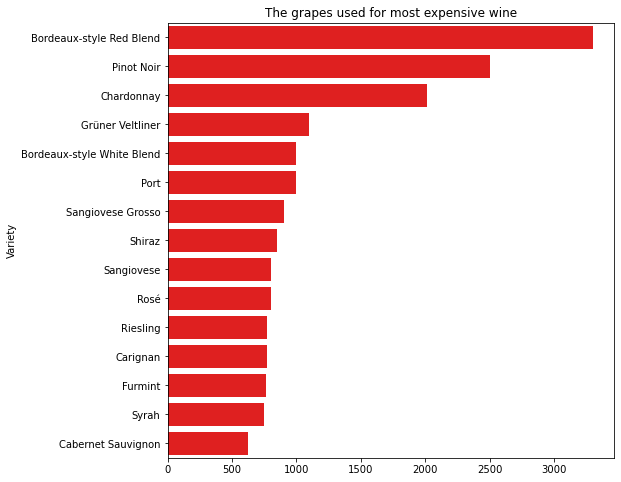

In [25]:
fig, ax = plt.subplots(figsize=(8, 8))
w = df.groupby(['variety'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x=w['price'], y=w.index, color='red', ax=ax)
ax.set_title('The grapes used for most expensive wine')
ax.set_ylabel('Variety')
ax.set_xlabel('')
plt.subplots_adjust(wspace=0.3)
plt.show()

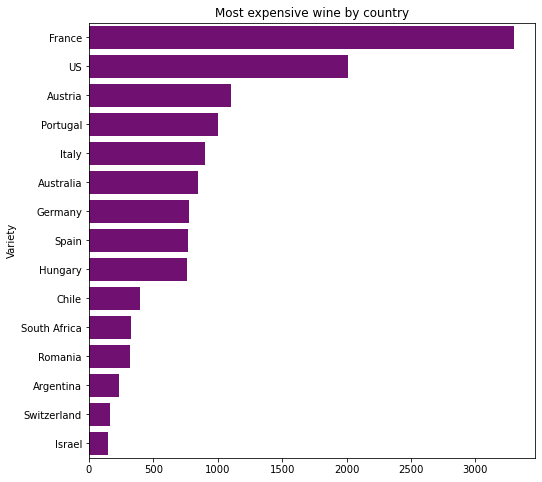

In [26]:
fig, ax = plt.subplots(figsize=(8, 8))
w = df.groupby(['country'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x=w['price'], y=w.index, color='purple', ax=ax)
ax.set_title('Most expensive wine by country')
ax.set_ylabel('Variety')
ax.set_xlabel('')
plt.subplots_adjust(wspace=0.3)
plt.show()

Milestone 2 : Data Preparation 

In [41]:
#Drop the taster name column because I do not need to know the people names in the anaylsis also alot is missing. 
df1= df.drop('taster_name', 1, inplace=True)

#Drop region 1 and 2 because there are too many missing values also, I still have  province and country
df1 = df.drop('region_1',1, inplace=True)
df1 = df.drop('region_2',1, inplace=True)

#Dropping twitter handle because alot of them are missing as well as I dont need it. 
df1 = df.drop('taster_twitter_handle',1, inplace=True)

#Drop designation because there are other categories that shows the area and I do not need the specific vineyeard names
df1 = df.drop('designation', 1,inplace=True)

# drop the first column because it is just a label which python labels anyways
df1 = df.drop('Unnamed: 0', 1 , inplace = True )

In [42]:
df.dtypes

country         object
description     object
points           int64
price          float64
province        object
title           object
variety         object
winery          object
dtype: object

In [48]:
print(df.isna().sum())

country          59
description       0
points            0
price          8395
province         59
title             0
variety           1
winery            0
dtype: int64


In [49]:
#I am filling the price columns with the mean because the 8395 is less than 6% of the total
df['price'] = df['price'].fillna(df['price'].mean())

In [50]:
#I am filling province and country with the mode because it is only 59 missing values which is less than 1% 
#of the data frame and I would like to keep these columns, if not needed I will delete the later. 
df['province'] = df['province'].fillna(df['province'].mode()[0])
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['variety'] = df['variety'].fillna(df['variety'].mode()[0])

In [51]:
# I ran this a couple times to make sure that all my variables were taken care of. 
print(df.isna().sum())

country        0
description    0
points         0
price          0
province       0
title          0
variety        0
winery         0
dtype: int64


In [52]:

#converting all letters to lower cause 
df['description'] = df['description'].str.lower()

#remove punctuations and special characters
df['description'] = df['description'].str.replace(r'[^\w\s]+', '')
df.head()

C:\Users\nekei\AppData\Local\Temp/ipykernel_20000/2266573878.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df['description'].str.replace(r'[^\w\s]+', '')


,country,description,points,price,province,title,variety,winery
0,Italy,aromas include tropical fruit broom brimstone ...,87,35.620747,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,this is ripe and fruity a wine that is smooth ...,87,15.000000,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,tart and snappy the flavors of lime flesh and ...,87,14.000000,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,pineapple rind lemon pith and orange blossom s...,87,13.000000,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,much like the regular bottling from 2012 this ...,87,65.000000,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [53]:
# Remove stop words
# import library
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# Import stopwords with nltk
stop = stopwords.words('english')
df['description'] = df['description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head(5)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nekei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,country,description,points,price,province,title,variety,winery
0,Italy,aromas include tropical fruit broom brimstone ...,87,35.620747,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,ripe fruity wine smooth still structured firm ...,87,15.000000,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,tart snappy flavors lime flesh rind dominate g...,87,14.000000,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,pineapple rind lemon pith orange blossom start...,87,13.000000,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,much like regular bottling 2012 comes across r...,87,65.000000,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [56]:
df['description'].str.split(expand=True).stack().value_counts().head(60)

wine          72152
flavors       57954
fruit         41572
aromas        36242
palate        34726
finish        32123
acidity       32101
tannins       28443
drink         27553
cherry        25144
ripe          24768
black         23358
notes         17454
red           17328
spice         17312
rich          16050
fresh         15528
nose          15476
oak           15388
dry           14312
berry         14252
plum          12932
soft          12536
fruits        12450
blend         12047
blackberry    11731
apple         11703
crisp         11692
sweet         11652
offers        11514
texture       11416
white         11271
shows         10701
light         10513
dark          10452
citrus        10434
bright        10014
vanilla        9853
well           9762
cabernet       9739
full           9243
pepper         9106
juicy          8948
good           8837
fruity         8693
raspberry      8594
firm           8422
green          8353
touch          7800
peach          7780


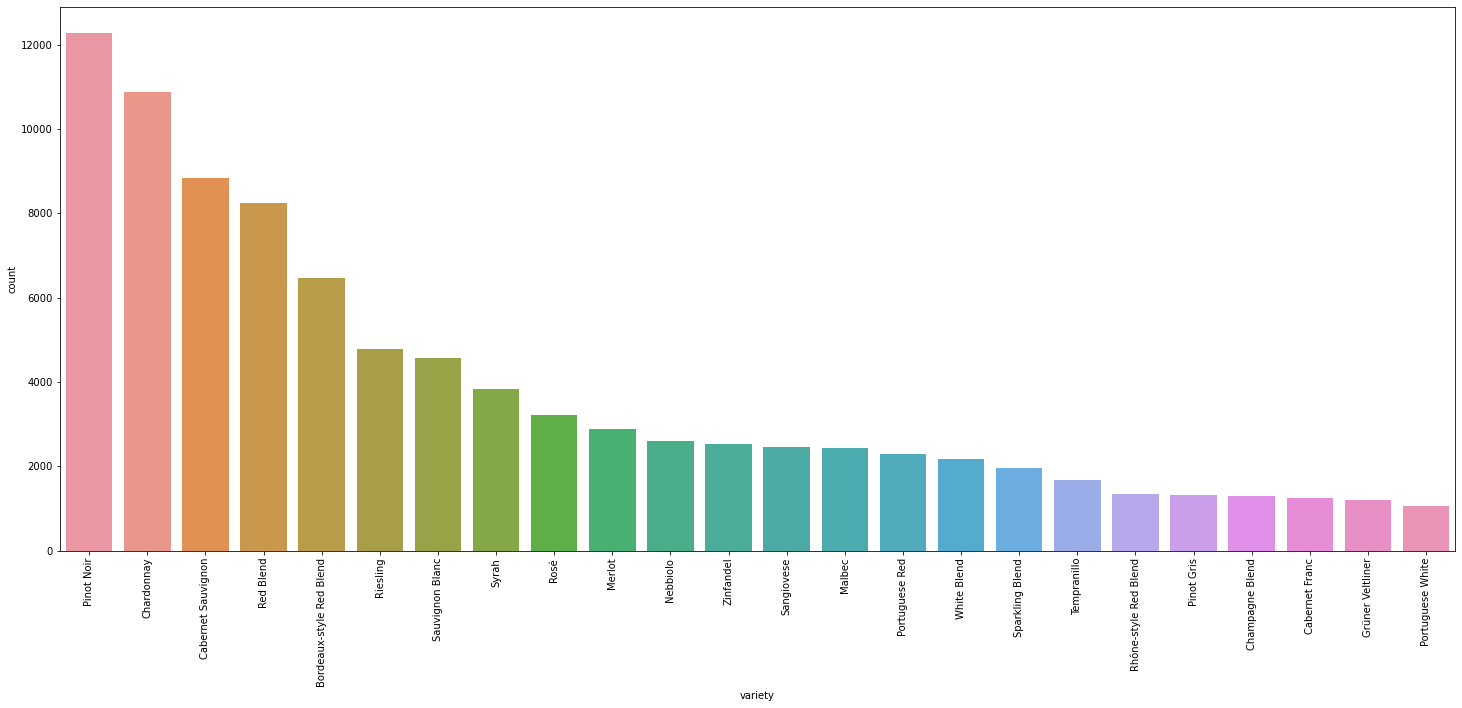

In [57]:
#I am going to try to use some clustering to see if that will help find similarities between wines maybe. 
variety = df.groupby('variety').filter(lambda x: len(x) > 1000 )
varieties = variety ['variety'].value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot(x = variety['variety'], order = varieties, ax = ax)
plt.xticks(rotation = 90)
plt.show()